0


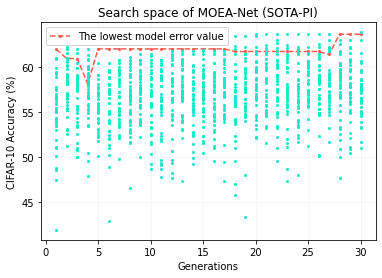

In [1]:
# https://matplotlib.org/3.1.1/tutorials/colors/colors.htmlturquoise
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html
# sudo apt-get install inkscape -y

%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np

fig, ax = plt.subplots()

ax.set_xlabel('Generations')
ax.set_ylabel('CIFAR-10 Accuracy (%)')
ax.set_title('Search space of MOEA-Net (SOTA-PI)')

ax = plt.gca()
#ax.set_ylim([36,55])

index = range(1, 31)

for i in range(1, 41):
    line_count = 0
    tmp_acc = []
    front = []
    with open('result_acc.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            if line_count == 0:
                line_count += 1
            else:
                tmp_acc.append(float(row[i]))
                line_count += 1
                
    if i == 1:
        print(len(front))
        plt.plot(index, tmp_acc, 'xkcd:coral', ls='--', marker='.', markersize=4, label='The lowest model error value')
    else:
        plt.plot(index, tmp_acc, 'xkcd:aqua', ls='', marker='.', markersize=4)
        

bottom, top = plt.ylim() 
plt.ylim((bottom,top))
plt.legend()

plt.grid(b=True, which='major', color='#F4F4F4', linestyle='-')

plt.show()
#fig.savefig("foo.pdf", bbox_inches='tight')

0


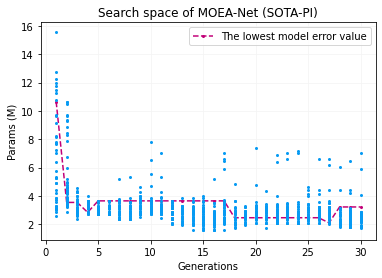

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import numpy as np

fig, ax = plt.subplots()

ax.set_xlabel('Generations')
ax.set_ylabel('Params (M)')
ax.set_title('Search space of MOEA-Net (SOTA-PI)')

ax = plt.gca()
#ax.set_ylim([36,55])

index = range(1, 31)

for i in range(1, 41):
    line_count = 0
    tmp_acc = []
    front = []
    with open('result_params.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            if line_count == 0:
                line_count += 1
            else:
                tmp_acc.append(float(row[i]))
                line_count += 1
                
    if i == 1:
        print(len(front))
        plt.plot(index, tmp_acc, 'xkcd:magenta', ls='--', marker='.', markersize=4, label='The lowest model error value')
    else:
        plt.plot(index, tmp_acc, 'xkcd:azure', ls='', marker='.', markersize=4)
        

bottom, top = plt.ylim() 
plt.ylim((bottom,top))
plt.legend()

plt.grid(b=True, which='major', color='#F4F4F4', linestyle='-')

plt.show()
#fig.savefig("foo_parasm.pdf", bbox_inches='tight')

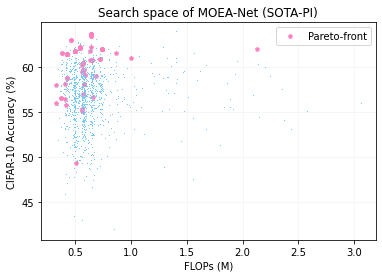

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tinydb import TinyDB, Query
db = TinyDB('data.json')
network = Query()

fig, ax = plt.subplots()

SOTA = True
SOTA_Text = ' (SOTA-PI)'

title = 'Search space of MOEA-Net'

if SOTA:
    title = 'Search space of MOEA-Net'+ SOTA_Text

ax.set_xlabel('FLOPs (M)')
ax.set_ylabel('CIFAR-10 Accuracy (%)')
ax.set_title(title)

ax = plt.gca()
#ax.set_ylim([36,55])

index = range(1, 31)

df = None
data_df = []

bit_check_first = True

for i in range(1,31):
    gen_index = i
    gen = db.search(network.generation == gen_index)
    index = 0
    
    tmp_acc = []
    tmp_flops = []
    
    tmp_acc_front = []
    tmp_flops_front = []
    
    for data in gen:
        data_df.append(data)

        if data['front']:
            tmp_acc_front.append(data['accuracy'])
            tmp_flops_front.append(data['flops'])
        else:
            tmp_acc.append(data['accuracy'])
            tmp_flops.append(data['flops'])
            
    plt.plot(tmp_flops, tmp_acc, 'xkcd:lightblue', ls='', marker=',', markersize=4)
    
    for flops, acc in zip(tmp_flops_front,tmp_acc_front):
        if bit_check_first:
            bit_check_first = False
            plt.plot(flops, acc, 'xkcd:pink', ls='', marker='p', markersize=4, label='Pareto-front')
        else:
            plt.plot(flops, acc, 'xkcd:pink', ls='', marker='p', markersize=4)
        
df = pd.DataFrame(data_df)

bottom, top = plt.ylim() 
plt.ylim((bottom,top))
plt.legend()

plt.grid(b=True, which='major', color='#F4F4F4', linestyle='-')
plt.legend()
plt.show()
fig.savefig("acc_vs_flops.pdf", bbox_inches='tight')

!inkscape -f=acc_vs_flops.pdf --export-emf=acc_vs_flops.emf
!rm *.pdf

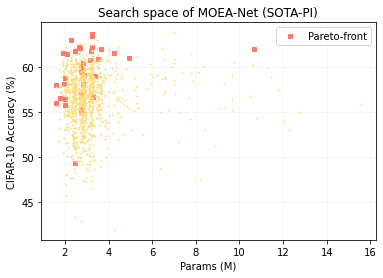

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tinydb import TinyDB, Query
db = TinyDB('data.json')
network = Query()

fig, ax = plt.subplots()

ax.set_xlabel('Params (M)')
ax.set_ylabel('CIFAR-10 Accuracy (%)')
ax.set_title(title)

ax = plt.gca()
#ax.set_ylim([36,55])

index = range(1, 31)

df = None
data_df = []

bit_check_first = True

for i in range(1,31):
    gen_index = i
    gen = db.search(network.generation == gen_index)
    index = 0
    
    tmp_acc = []
    tmp_flops = []
    
    tmp_acc_front = []
    tmp_flops_front = []
    
    for data in gen:
        data_df.append(data)

        if data['front']:
            tmp_acc_front.append(data['accuracy'])
            tmp_flops_front.append(data['params'])
        else:
            tmp_acc.append(data['accuracy'])
            tmp_flops.append(data['params'])
            
    plt.plot(tmp_flops, tmp_acc, 'xkcd:wheat', ls='', marker='.', markersize=2)
    
    for flops, acc in zip(tmp_flops_front,tmp_acc_front):
        if bit_check_first:
            bit_check_first = False
            plt.plot(flops, acc, 'xkcd:salmon', ls='', marker='s', markersize=4, label='Pareto-front')
        else:
            plt.plot(flops, acc, 'xkcd:salmon', ls='', marker='s', markersize=4)
        
df = pd.DataFrame(data_df)

bottom, top = plt.ylim() 
plt.ylim((bottom,top))
plt.legend()

plt.grid(b=True, which='major', color='#F4F4F4', linestyle='-')
plt.legend()
plt.show()
fig.savefig("acc_vs_params.pdf", bbox_inches='tight')

!inkscape -f=acc_vs_params.pdf --export-emf=acc_vs_params.emf
!rm *.pdf

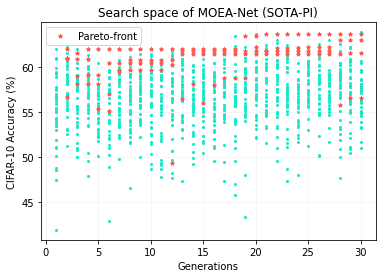

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tinydb import TinyDB, Query
db = TinyDB('data.json')
network = Query()

fig, ax = plt.subplots()

ax.set_xlabel('Generations')
ax.set_ylabel('CIFAR-10 Accuracy (%)')
ax.set_title(title)

ax = plt.gca()
#ax.set_ylim([36,55])

index = range(1, 31)

index_pop = range(1, 41)

df = None
data_df = []

bit_check_first = True

for i in range(1,31):
    gen_index = i
    gen = db.search(network.generation == gen_index)
    index = 0
    
    tmp_acc = []
    tmp_flops = []
    
    tmp_acc_front = []
    tmp_flops_front = []
    
    for data in gen:
        data_df.append(data)

        if data['front']:
            tmp_acc_front.append(data['accuracy'])
            tmp_flops_front.append(data['params'])
        else:
            tmp_acc.append(data['accuracy'])
            tmp_flops.append(data['params'])
            
    plt.plot(np.full((len(tmp_acc)), i), tmp_acc, 'xkcd:aqua', ls='', marker='.', markersize=4)
    
    for acc in tmp_acc_front:
        if bit_check_first:
            bit_check_first = False
            plt.plot(i, acc, 'xkcd:coral', ls='', marker='*', markersize=4, label='Pareto-front')
        else:
            plt.plot(i, acc, 'xkcd:coral', ls='', marker='*', markersize=4)
        
    
bottom, top = plt.ylim() 
plt.ylim((bottom,top))
plt.legend()

plt.grid(b=True, which='major', color='#F4F4F4', linestyle='-')
plt.legend()
plt.show()
fig.savefig("acc_vs_gen.pdf", bbox_inches='tight')

!inkscape -f=acc_vs_gen.pdf --export-emf=acc_vs_gen.emf
!rm *.pdf

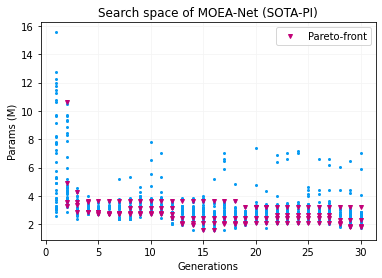

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tinydb import TinyDB, Query
db = TinyDB('data.json')
network = Query()

fig, ax = plt.subplots()

ax.set_xlabel('Generations')
ax.set_ylabel('Params (M)')
ax.set_title(title)

ax = plt.gca()
#ax.set_ylim([36,55])

index = range(1, 31)

index_pop = range(1, 41)

df = None
data_df = []

bit_check_first = True

for i in range(1,31):
    gen_index = i
    gen = db.search(network.generation == gen_index)
    index = 0
    
    tmp_acc = []
    tmp_flops = []
    
    tmp_acc_front = []
    tmp_flops_front = []
    
    for data in gen:
        data_df.append(data)

        if data['front']:
            tmp_acc_front.append(data['accuracy'])
            tmp_flops_front.append(data['params'])
        else:
            tmp_acc.append(data['accuracy'])
            tmp_flops.append(data['params'])
            
    plt.plot(np.full((len(tmp_flops)), i), tmp_flops, 'xkcd:azure', ls='', marker='.', markersize=4)
    
    for acc in tmp_flops_front:
        if bit_check_first:
            bit_check_first = False
            plt.plot(i, acc, 'xkcd:magenta', ls='', marker='v', markersize=4, label='Pareto-front')
        else:
            plt.plot(i, acc, 'xkcd:magenta', ls='', marker='v', markersize=4)
        
    
bottom, top = plt.ylim() 
plt.ylim((bottom,top))
plt.legend()

plt.grid(b=True, which='major', color='#F4F4F4', linestyle='-')
plt.legend()
plt.show()
fig.savefig("params_vs_gen.pdf", bbox_inches='tight')

!inkscape -f=params_vs_gen.pdf --export-emf=params_vs_gen.emf
!rm *.pdf